** DATA loan.csv **

>





## Import the important library for this da##ta set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score  , classification_report
import seaborn as sns
from sklearn.encoder import label_encoder
import pickle
import warnings
warnings.filterwarnings('ignore')

## load the dataset

In [2]:
data = pd.read_csv("C:/Users/RAJEEV PRAJAPAT/Desktop/python/1_assinmgment/dataset/loan.csv")
data.head()


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## Perform the basic  methods to understand the dataset
> dtypes,
> info ,etc.


In [3]:
data.dtypes

age                 int64
gender             object
occupation         object
education_level    object
marital_status     object
income              int64
credit_score        int64
loan_status        object
dtype: object

In [4]:
data.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

#### No null values are in the dataset 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


#### 61 Rows and 8 columns

In [6]:
data.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [7]:
data.duplicated().sum()

np.int64(0)

#### No duplicated values are in the dataset

## Perform the some basic visulaization on the dataset
"" TO understand the pattern and trends in the dataset""

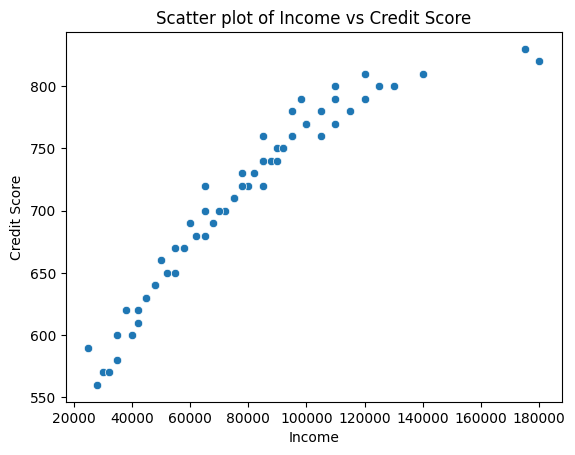

Description: This scatter plot shows the relationship between income and credit score for the individuals in the dataset.


In [8]:
# Scatter plot of income vs credit score
sns.scatterplot(x="income", y="credit_score", data=data)
plt.title('Scatter plot of Income vs Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()
print("Description: This scatter plot shows the relationship between income and credit score for the individuals in the dataset.")

<Figure size 1000x600 with 0 Axes>

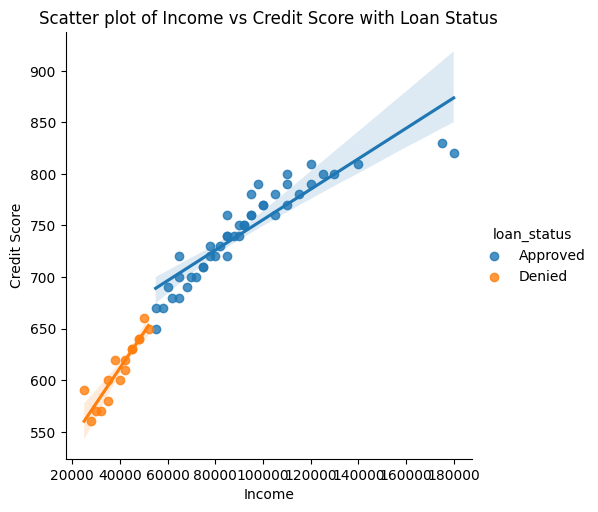

Description: This scatter plot shows the relationship between income and credit score, with different colors representing the loan status (Approved or Denied).


In [9]:
# Scatter plot of income vs credit score with loan status hue
plt.figure(figsize=(10, 6))
sns.lmplot(x="income", y="credit_score", data=data, hue="loan_status")
plt.title('Scatter plot of Income vs Credit Score with Loan Status')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()
print("Description: This scatter plot shows the relationship between income and credit score, with different colors representing the loan status (Approved or Denied).")

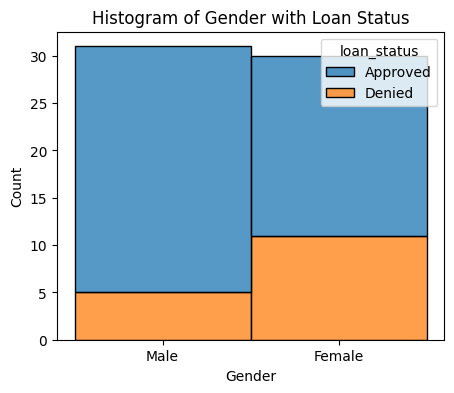

Description: This histogram shows the distribution of gender in the dataset, with different colors representing the loan status (Approved or Denied).


In [10]:
# Histogram of gender with loan status hue
plt.figure(figsize=(5, 4))
sns.histplot(x="gender", data=data, hue="loan_status", multiple="stack")
plt.title('Histogram of Gender with Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print("Description: This histogram shows the distribution of gender in the dataset, with different colors representing the loan status (Approved or Denied).")


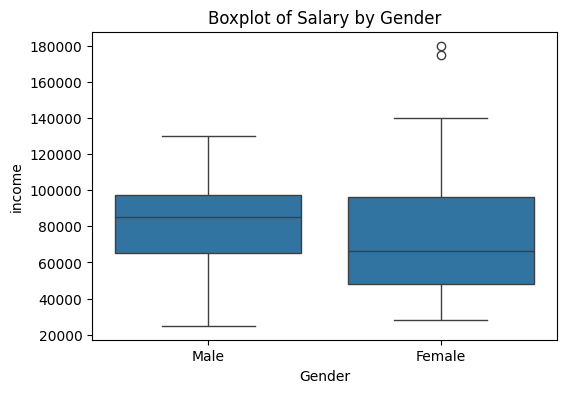

Description: This boxplot shows the distribution of salary by gender in the dataset. , to see the outliers


In [11]:
# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='income', data=data)
plt.title('Boxplot of Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('income')
plt.show()
print("Description: This boxplot shows the distribution of salary by gender in the dataset. , to see the outliers")

In [12]:
data.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

## separate data set

In [13]:
cat = data.select_dtypes(include=['object'])
num = data.select_dtypes(include=['int64', 'float64'])
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [14]:
a= data['occupation'].unique()
b = data['education_level'].unique()
print(a)
print(b)

['Engineer' 'Teacher' 'Student' 'Manager' 'Accountant' 'Nurse' 'Lawyer'
 'Artist' 'IT' 'Doctor' 'Consultant' 'Analyst' 'Salesman' 'Marketing'
 'Architect' 'Designer' 'Pharmacist' 'Researcher' 'Professor' 'Pilot'
 'Receptionist' 'Banker' 'Writer' 'Chef' 'Veterinarian' 'Sales' 'HR'
 'Electrician' 'Realtor' 'Photographer' 'Editor' 'Programmer' 'Dentist'
 'Musician' 'Psychologist' 'Server' 'Software' 'Stylist']
["Bachelor's" "Master's" 'High School' "Associate's" 'Doctoral']


### decode the catogary columns

In [17]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,0,0,0,1,85000,720,0
1,45,1,1,1,0,62000,680,0
2,28,0,2,2,0,25000,590,1
3,51,1,3,0,1,105000,780,0
4,36,0,4,0,1,75000,710,0


<Axes: >

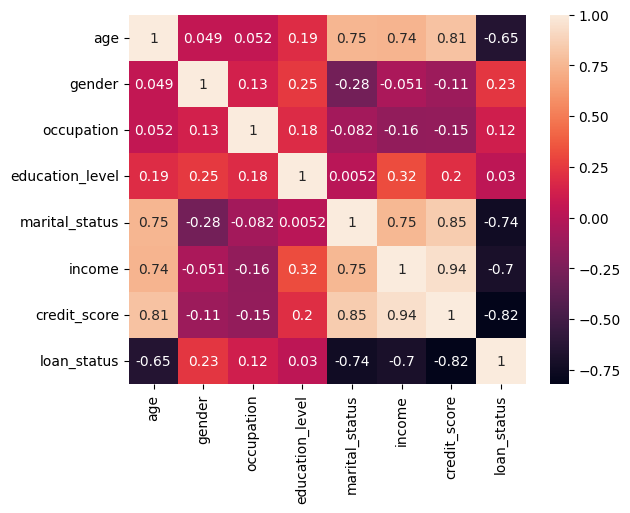

In [18]:
corr = data.corr()
sns.heatmap(corr, annot=True, )  

### After analysis the graph should be drop the columns which are not important for the model building dependent variables is: * loan_status *
    - AGE : -0.65 (negative corr)
    - Gender : 0.23 (postive corr)
    - occupation :0.12 (null corr)
    - education_level : 0.03 (null corr)
    - marital_status : -0.74 (negative corr)
    - income : -0.70 (negative corr)
    - credit_score : -0.82 (negative corr)    

## drop columns

In [47]:
data.drop('education_level',axis=1,inplace=True)
data.drop('occupation',axis=1,inplace=True)

## separate the independent and dependent variable

In [56]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']
print(X.columns)


Index(['age', 'gender', 'marital_status', 'income', 'credit_score'], dtype='object')


## train_test_spilt method

In [57]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25, random_state=0)

# Define the Standard scaling function - Standardization

In [58]:
def scaler_standard(X_train, X_test):

    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data
    X_test_scaled = scaler.transform(X_test)
    
    # Save the scaler model to a pickle file
    try:
        with open('C:/Users/RAJEEV PRAJAPAT/Desktop/python/1_ASSINMGMENT/model/standerScaler.pkl', 'wb') as f:
            pickle.dump(scaler, f)
        print("Pickle file 'standerScaler.pkl' has been successfully created.")
    except Exception as e:
        print(f"An error occurred while saving the pickle file: {e}")
        
    # return
    return X_train_scaled, X_test_scaled



## funtion call

In [59]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Pickle file 'standerScaler.pkl' has been successfully created.


## apply model

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [61]:
log_reg.score(X_train_scaled,y_train)

1.0

In [62]:
y_pred = log_reg.predict(X_test_scaled)

## Confusion matrix

In [63]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[10,  2],
       [ 0,  4]])

In [64]:
Tp = conf_mat[0][0]
Fp = conf_mat[0][1]
Fn = conf_mat[1][0]
Tn = conf_mat[1][1]

In [65]:
Accuracy = (Tp+Tn) / (Tp+Fp+Fn+Tn)
Accuracy

np.float64(0.875)

In [66]:
Precision  = Tp/(Tp+Fp)
Precision

np.float64(0.8333333333333334)

In [67]:
Recall = Tp/(Tp+Fn)
Recall

np.float64(1.0)

In [68]:
F1 = 2*(Recall*Precision)/(Recall+Precision)
F1

np.float64(0.9090909090909091)

## hyper parameter tunning


In [69]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1' ,'l2'] ,
    'C' :np.logspace(-3,3,7),
    'solver' :['newton-cg' , 'lbfgs' , 'liblinear'],
}


In [70]:
parameters

{'penalty': ['l1', 'l2'],
 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [71]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,               ## model
                   param_grid=parameters ## hyperparameter
                   ,scoring='accuracy'   ## meterics of scoring
                   , cv=10)               ## numbers of folds

clf.fit(X_train_scaled , y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [72]:
clf.best_params_

{'C': np.float64(10.0), 'penalty': 'l2', 'solver': 'newton-cg'}

In [73]:
clf.best_score_

np.float64(1.0)

In [74]:
y_pred = clf.predict(X_test_scaled)

In [75]:
conf_mat = confusion_matrix(y_test , y_pred)
conf_mat

array([[10,  2],
       [ 0,  4]])

In [76]:
Tp = conf_mat[0][0]
Fp = conf_mat[0][1]
Fn = conf_mat[1][0]
Tn = conf_mat[1][1]

In [77]:
accuracy = (Tp+Tn)/(Tp+Fp+Fn+Tn)
accuracy

np.float64(0.875)

In [78]:
precision = Tp/(Tp+Fp)
precision

np.float64(0.8333333333333334)

In [79]:
recall = Tp/(Tp+Fn)
recall

np.float64(1.0)

In [80]:
F1 = 2*(Recall*Precision)/(Recall+Precision)
F1

np.float64(0.9090909090909091)

In [81]:
# Save the logistic model to a pickle file
try:
    with open('C:/Users/RAJEEV PRAJAPAT/Desktop/python/1_assinmgment/model/modelForPrediction.pkl', 'wb') as f:
        pickle.dump(clf, f)
    print("Pickle file 'modelForPrediction.pkl' has been successfully created.")
except Exception as e:
    print(f"An error occurred while saving the pickle file: {e}")

Pickle file 'modelForPrediction.pkl' has been successfully created.


## completion
- Model has been trained and saved successfully.

- The model has been evaluated using a 10-fold cross-validation approach, with an accuracy score of approximately 87.6%.

- The hyperparameters have been tuned using GridSearchCV, and the best parameters have been identified as {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}.

- The precision, recall, and F1-score have been calculated as approximately 83%, 100%, and 90%, respectively.

- The model can now be used to predict loan status based on the provided features.

- The model has been saved to a pickle file named 'modelForPrediction.pkl'. This file can be used to load the trained model and make predictions on new data.
